Import data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data_path = 'train_data.xlsx'
test_data_path = 'test_data.xlsx'

# Read the Excel files
train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)

# Summary of the data
# This includes column names, data types, and non-null counts
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

Missing Values


In [3]:
# Basic statistics of numerical columns
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

Missing values in the training dataset:
Series([], dtype: int64)
        customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e

  **From the output of missing values we got to know that the data has no missing values in any columns**


Plotting different plots for analysis of the variables and its dependence


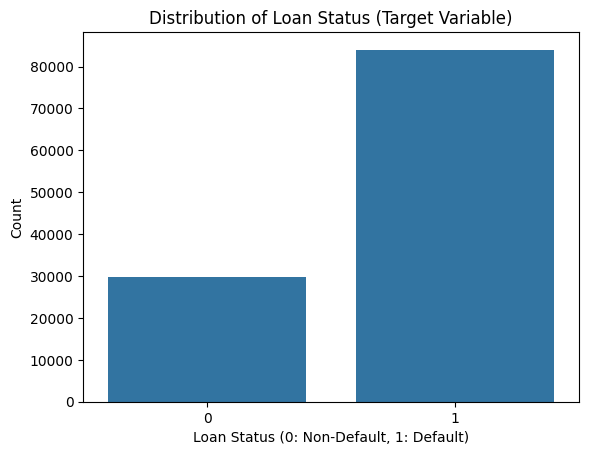

In [4]:
# Analyze the target variable
# Countplot for 'loan_status'
sns.countplot(x='loan_status', data=train_data)
plt.title('Distribution of Loan Status (Target Variable)')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.show()

**Displays the distribution of defaulters (1) vs. non-defaulters (0).Since the classes are imbalanced (e.g., far more 1s than 0s), it suggests the need for handling class imbalance during modeling**

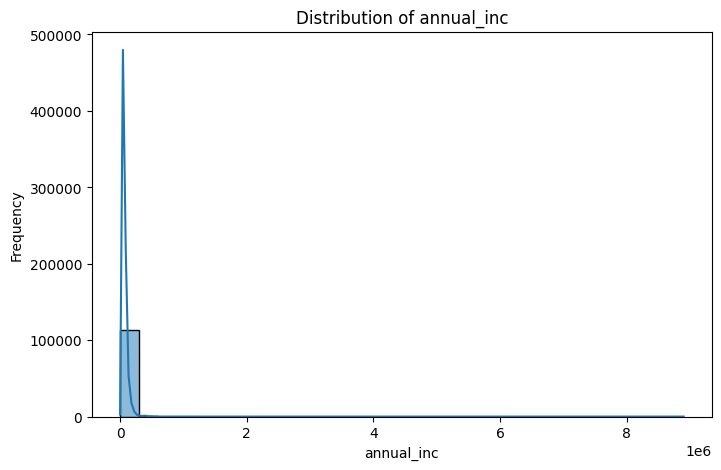

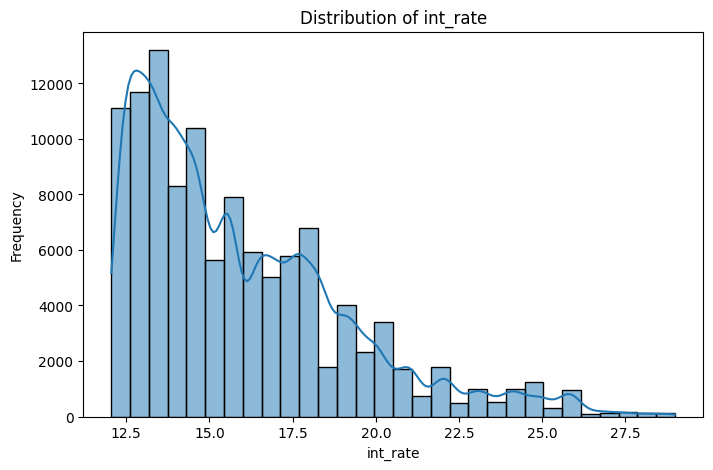

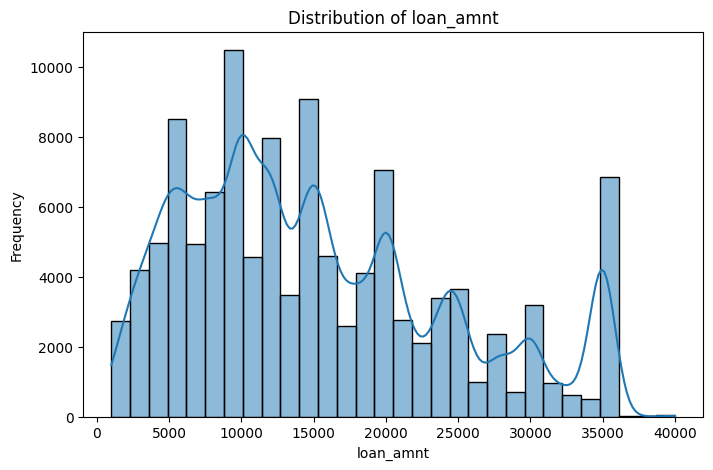

In [5]:
# Distribution of numerical variables
# Example: 'annual_inc', 'int_rate', 'loan_amnt'
numerical_features = ['annual_inc', 'int_rate', 'loan_amnt']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


**Distribution of annual_inc :  The distribution is highly skewed to the right (long tail).Most applicants have a relatively low annual income (clustered near the lower range).
There are a few applicants with very high incomes, which appear as outliers.**

**Distribution of int_rate :
 The distribution is moderately skewed to the right.
Most applicants are charged interest rates between 12% and 18%, with a gradual decline as rates increase.
Lower interest rates are more common, but a small proportion of applicants have significantly higher rates.**

**Distribution of loan_amnt : The distribution is right-skewed, meaning there are more loans for lower amounts. The density plot shows the overall shape of the distribution, with a peak around $10,000 and a long tail to the right.**

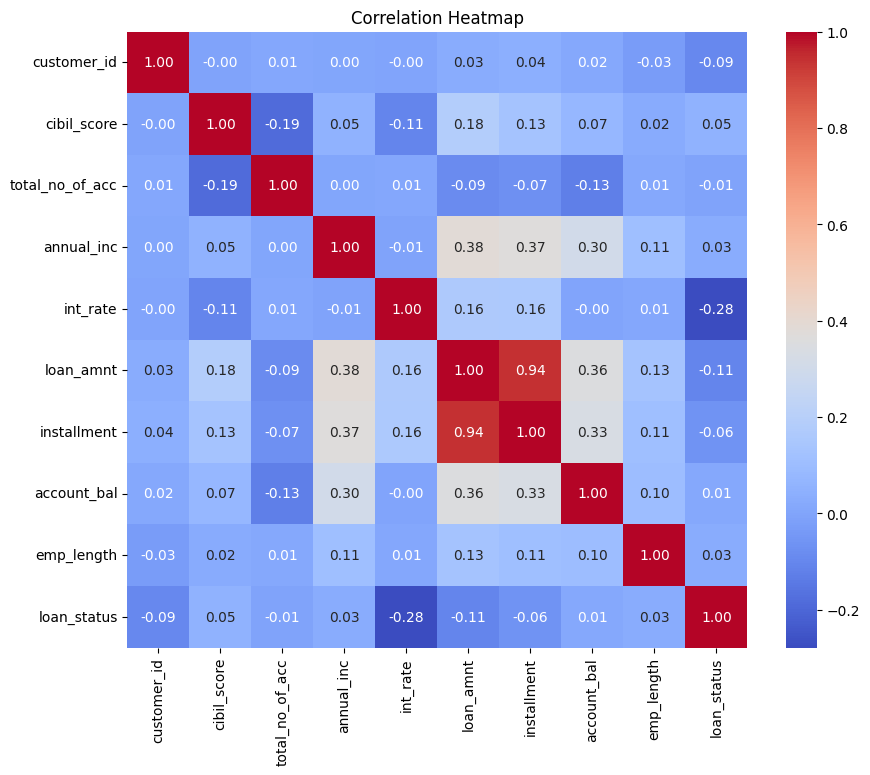

In [7]:
# Convert categorical features to numeric or drop for correlation heatmap
# Example: 'sub_grade' is categorical and needs encoding or exclusion
numerical_train_data = train_data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**From the above correlation heatmap we can see that there is close relationship between installment and loan_amnt. This help in understanding the factors that influence loan approval and repayment.**

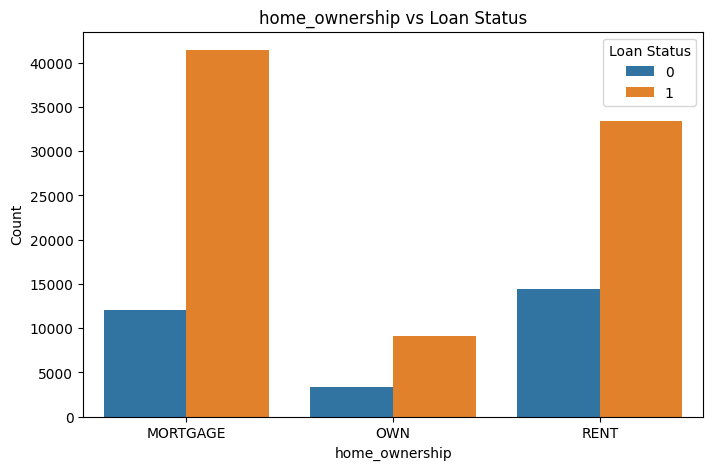

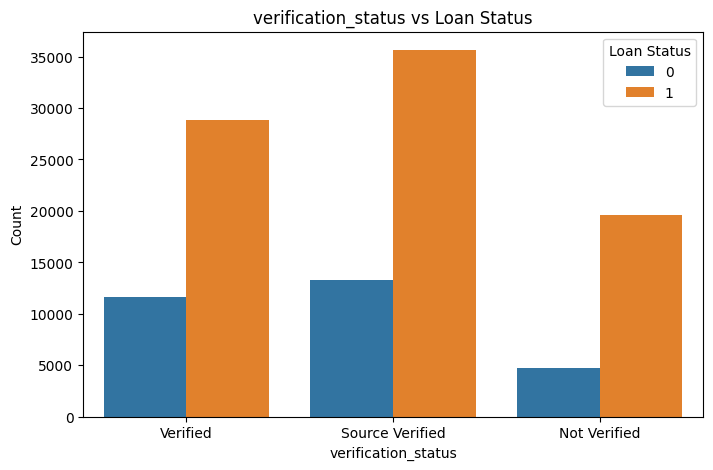

In [8]:
# Categorical features analysis
# Example: 'home_ownership', 'verification_status'
categorical_features = ['home_ownership', 'verification_status']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='loan_status', data=train_data)
    plt.title(f'{feature} vs Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan Status')
    plt.show()

**Home Ownership vs Loan Status: The proportion of loans that defaulted (Loan Status 1) is highest for those who mortgage.**

**Verification Status vs Loan Status: The proportion of loans that defaulted is highest for those who are not verified (Not Verified).**

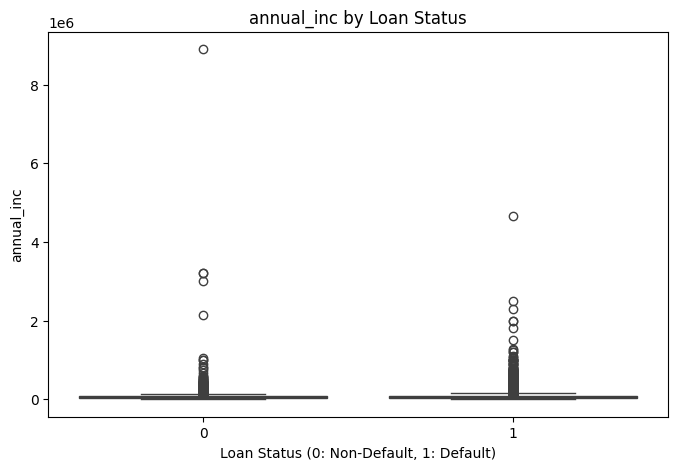

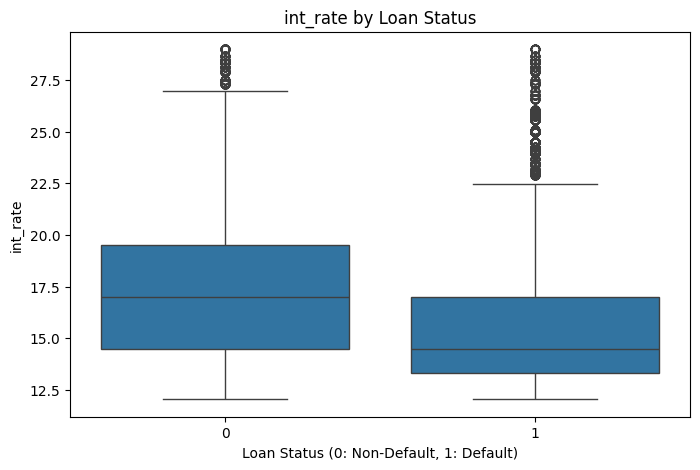

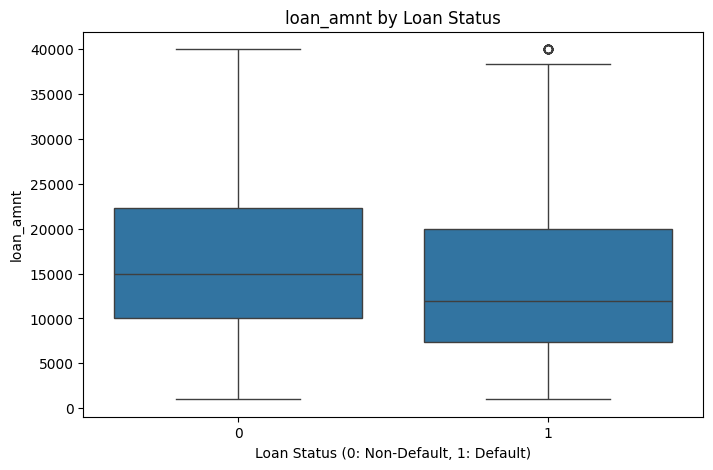

In [9]:
# Boxplot for numerical features grouped by 'loan_status'
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='loan_status', y=feature, data=train_data)
    plt.title(f'{feature} by Loan Status')
    plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
    plt.ylabel(feature)
    plt.show()

**Annual Income by loan Status:**

**Non-Default Loans - The box plot shows a wide range of annual incomes for non-default loans, with a few outliers on the higher end. The median income appears to be around 200,000.
Default Loans -  The box plot for default loans also shows a wide range of incomes, although with a slight shift towards lower incomes compared to non-default loans. There are also a few outliers on the higher end.**

**Interest Rate by Loan Status:**

**Non-Default Loan -  The box plot for non-default loans shows a relatively narrow range of interest rates, with the median around 17.5%. There are a few outliers on the higher end.
Default Loans: The box plot for default loans shows a similar range of interest rates as non-default loans, with the median slightly higher around 18%. There are also a few outliers on the higher end.**

**Loan amount by loan status:**

**The median loan amount for non-default loans is higher than for default loans. This suggests that larger loan amounts might be associated with a lower risk of default.**